<a href="https://colab.research.google.com/github/phan-le-phu/CS114.K21/blob/master/round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Tải tập dữ liệu từ đường dẫn http://cs.uit.edu.vn/data3.txt



In [0]:

# Load dataset
url = "http://cs.uit.edu.vn/data3.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

In [11]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.info())

(10590, 2)
       sizes    times
0   37837612  4.12166
1   37395246  3.92089
2   36610827  3.21540
3   29555651  2.54506
4   25928216  2.21831
5   30423112  2.61376
6   21881189  1.85961
7   35810179  3.14761
8   35355055  3.07585
9   29399699  2.56714
10  26742410  2.33296
11  22226708  1.89650
12  36012167  3.11725
13  20012216  1.69030
14  30359668  2.60618
15  36964801  3.22989
16  36575580  3.21127
17  34097080  2.96928
18  34567269  2.99348
19  37992370  3.31558
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sizes   10590 non-null  int64  
 1   times   10590 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 165.6 KB
None


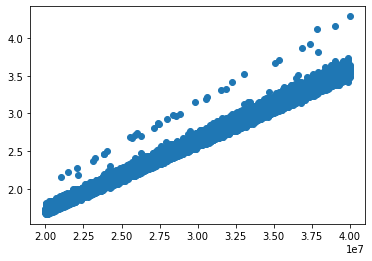

In [12]:
plt.scatter(dataset["sizes"], dataset["times"])
plt.show()

# sử dụng model ở round 2 để kiêm tra với tập dữ liệu mới data3.txt



# tải model ở round 2 đã được lưu trên google drive

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
model_save_name = 'round2_model.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
round2_model = torch.load(path)

# Kiểm thử model ở round 2 với tập dữ liệu mới

In [0]:
Y_pred = round2_model.predict(dataset["sizes"].values.reshape(-1, 1))

In [26]:
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(dataset["times"], Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(dataset["times"], Y_pred))

Mean squared error: 0.02063167837707020544
Coefficient of determination: 0.93


# Nhận xét thấy model mean squared error tăng lên khá nhiều với so với kêt quá cũ và R^2 thay đổi còn 0.93
# Kích thước test dữ liệu ở round 2 là 14223 entries và kích thước test dữ liệu ở round 3 là 10590. Khá tương đồng nên có thể kích thước dữ liệu không ảnh hưởng đáng kể
# Nhưng dựa vào biểu minh họa sự phân bố dữ liệu của dataset 2 và dataset 3 thì dataset 3 có nhiều giá trị nhiễu hơn so với dataset 2 => đây có thể là nguyên nhân
# Có thể model ở round 2 còn thiếu vài features khác ta có thể kiểm chứng sau đây


*sự phân bố của tập dataset 2*



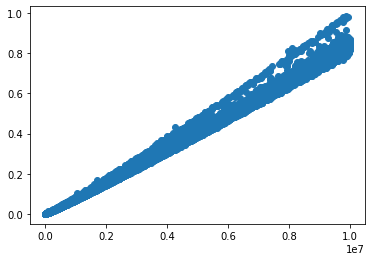

In [27]:
# Load dataset
url = "http://cs.uit.edu.vn/data2.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)
plt.scatter(dataset["sizes"], dataset["times"])
plt.show()

*sự phân bố của tập dataset 3*

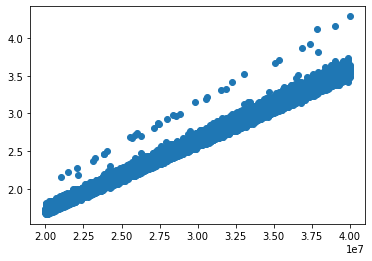

In [28]:
url = "http://cs.uit.edu.vn/data3.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)
plt.scatter(dataset["sizes"], dataset["times"])
plt.show()

# Thêm các features mới (sizes_square log_2_sizes) và xây dựng model mới dựa trên tập dataset 2

In [29]:
url = "https://cs.uit.edu.vn/data2.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

# add  new features (n^2, log2n)
sizes_square = []
log_2_sizes = []
for index, row in dataset.iterrows():
  sizes_square.append(row["sizes"] ** 2)
  log_2_sizes.append(math.log2(row["sizes"]))
dataset["sizes_square"] = sizes_square
dataset["log_2_sizes"] = log_2_sizes

X_train, X_test, Y_train, Y_test = train_test_split(dataset.loc[:, ['sizes', 'sizes_square', 'log_2_sizes']], dataset["times"], test_size = 0.2)
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)


my_new_model =  linear_model.LinearRegression()

my_new_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Kiểm tra model mới được tạo với tập dự liệu X_test có được khi split từ dataset 2

In [30]:
Y_pred = my_new_model.predict(X_test)
# The coefficients
# print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

Mean squared error: 0.00012609948571945564
Coefficient of determination: 1.00


# Kiểm ta model mới được tạo với tập dữ liệu dataset 3

In [31]:
url = "https://cs.uit.edu.vn/data3.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

# add  new features (n^2, log2n)
sizes_square = []
log_2_sizes = []
for index, row in dataset.iterrows():
  sizes_square.append(row["sizes"] ** 2)
  log_2_sizes.append(math.log2(row["sizes"]))
dataset["sizes_square"] = sizes_square
dataset["log_2_sizes"] = log_2_sizes

X_test = dataset.loc[:, ['sizes', 'sizes_square', 'log_2_sizes']]
Y_test = dataset["times"].values.reshape(-1, 1)

Y_pred = my_new_model.predict(X_test)
# The coefficients
# print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


Mean squared error: 0.04562061383058320374
Coefficient of determination: 0.84


# Nhìn nhận hai kết quả trên cũng giống như khi test với model ở round 2 là độ chính xác sẽ giảm khi test  dataset 3
# Nhưng hiệu suất khi test với dataset 3 của model ở round 3 lại nhở hơn với model ở round 2. Điểu này em đoán có thể là tập X_train, Y_train sau khi split dataset 2 để train cho mỗi model không tương đồng nhau (random) nến có thể dẫn đến kết quả không đồng nhất. Hoặc có thể model ở round 3  thêm các featrues chưa được chính xác so với hàm mục tiêu cần tìm nên dẫn đến độ sai lệch lớn hơn. 